# Decision Tree Classifier 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
# laods in data frame as df
df = pd.read_csv('/Users/tomjones/Documents/determining shot project/modelling.csv')

In [4]:
y = df.pop('shot_outcome') # sets target variable as y and removes it from df
X = df # sets remaining df as predictor variables x 

In [5]:
# creates test train split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        stratify=y, test_size=0.3, random_state=1)

In [6]:
# standardises predictor vriables 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [10]:
# sets up parameters for grid search
params = {'max_depth': [10, 20, 30, None],
          'max_features': ['auto', None],
          'criterion' : ['gini', 'entropy'],
          'class_weight' : ['balanced', None],
          'random_state' : [1],
          'min_samples_split': [2, 5, 10]}

In [11]:
# First create the base model to tune
dtc = DecisionTreeClassifier()
# Adds base model to hyper parameters for grid search cv
dtc_gs = GridSearchCV(estimator = dtc, param_grid = params, cv = 5, verbose=3, n_jobs = -1)
# Fit the random search model
dtc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  6.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', None],
                         'min_samples_split': [2, 5, 10], 'random_state': [1]},
             verbose=3)

In [13]:
print('Best Parameters:')
print(dtc_gs.best_params_)
print('Best estimator mean cross validated training score:')
print(dtc_gs.best_score_)
print('Best estimator score on the full training set:')
print(dtc_gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(dtc_gs.score(X_test, y_test))

Best Parameters:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 5, 'random_state': 1}
Best estimator mean cross validated training score:
0.9533814004314781
Best estimator score on the full training set:
0.963982374353407
Best estimator score on the test set:
0.9509833134684148


In [14]:
# sets up parameters for grid search
params_2 = {'max_depth': [5, 6, 7, 8, 9, 10],
          'max_features': [ None],
          'criterion' : ['gini'],
          'class_weight' : [None],
          'random_state' : [1],
          'min_samples_split': [4, 5, 6, 7, 8]}

In [15]:
# Adds base model to tuned parameters for grid search cv
dtc_gs2 = GridSearchCV(estimator = dtc, param_grid = params_2, cv = 5, verbose=3, n_jobs = -2)
# Fit the random search model
dtc_gs2.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  18 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-2)]: Done 114 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-2)]: Done 150 out of 150 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [None],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'random_state': [1]},
             verbose=3)

In [16]:
print('Best Parameters:')
print(dtc_gs2.best_params_)
print('Best estimator mean cross validated training score:')
print(dtc_gs2.best_score_)
print('Best estimator score on the full training set:')
print(dtc_gs2.score(X_train, y_train))
print('Best estimator score on the test set:')
print(dtc_gs2.score(X_test, y_test))

Best Parameters:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_split': 8, 'random_state': 1}
Best estimator mean cross validated training score:
0.9549140898516993
Best estimator score on the full training set:
0.9621942652787534
Best estimator score on the test set:
0.9518772348033373


In [17]:
# creates data frame of the feature importances 
df_feature = pd.DataFrame(dtc_gs2.best_estimator_.feature_importances_)

In [19]:
# creates data frame of the 10 most improtant feature variables with their name instead of index number 
df_feature_importances = pd.DataFrame(zip(X_train.columns,dtc_gs2.best_estimator_.feature_importances_)).sort_values(by = 1).tail(15)

In [20]:
# renames columns in data frame
df_feature_importances.columns = ['Feature','Importance']

In [21]:
df_feature_importances

,Feature,Importance
9,shot_deflected,0.004401
3399,area_of_goal_BM,0.004474
2815,type_name_1st_Clearance,0.004627
2811,type_name_1st_Block,0.006872
3076,type_name_2nd_Pass,0.009288
15,shot_open_goal,0.027651
6,duration,0.028230
149,angle_of_shot,0.035095
150,distance_from_goal,0.038387
3292,pass_body_part_name_3rd_None,0.073992


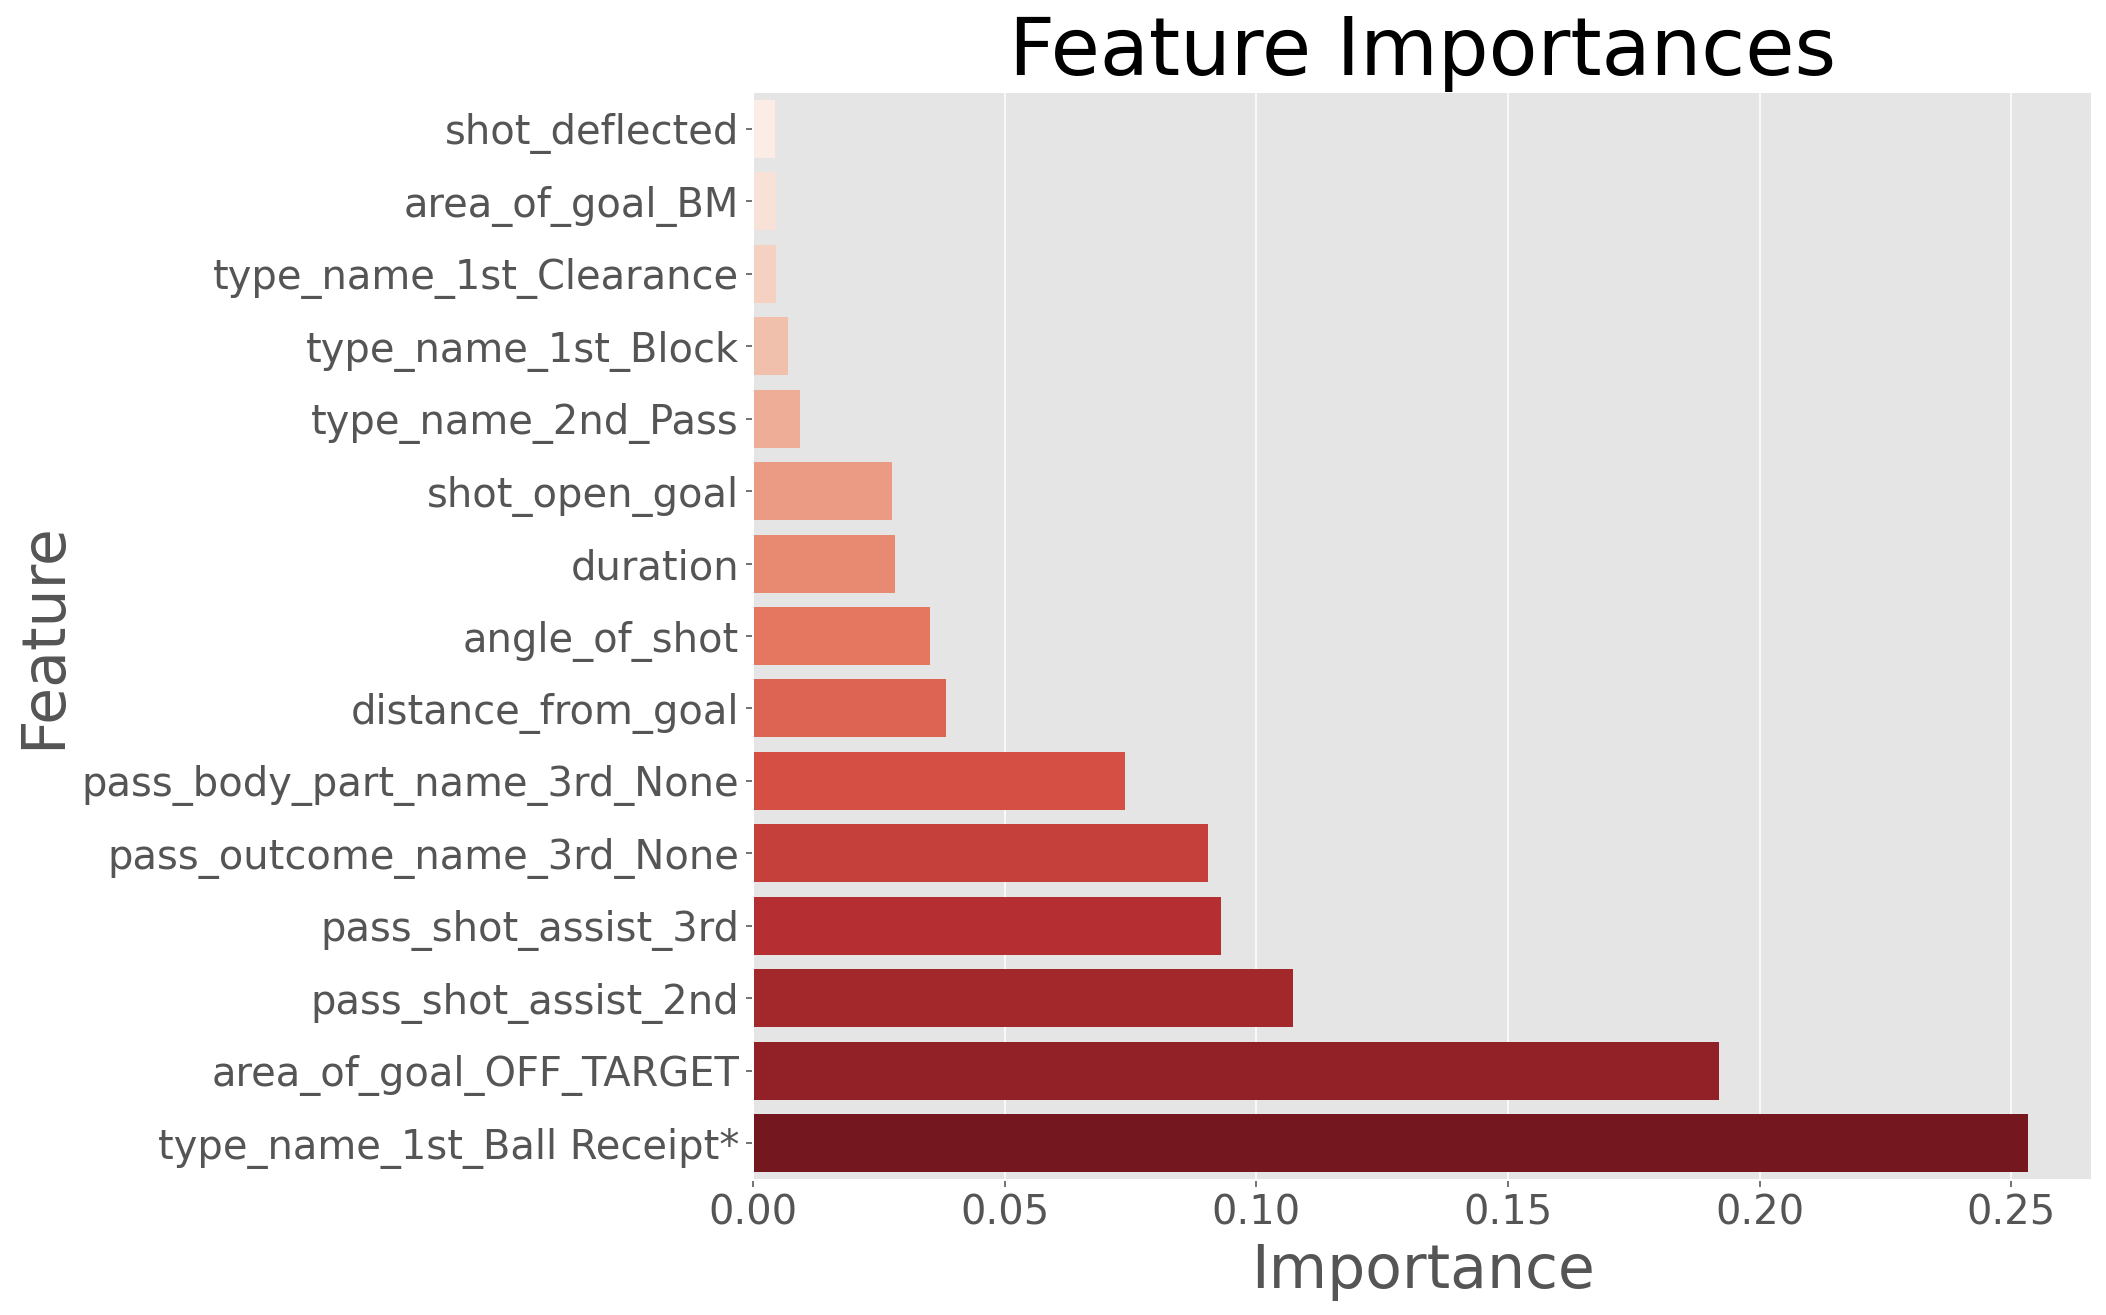

In [24]:
# plots bar plot of feature importances
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(y='Feature', x='Importance', data=df_feature_importances, palette='Reds', orient = 'h')
ax.set_title("Feature Importances",fontsize=40)
ax.set_xlabel("Importance",fontsize=30)
ax.set_ylabel("Feature",fontsize=30) 
ax.tick_params(labelsize=20)
plt.show()

In [25]:
import joblib
joblib.dump( rf_gs2, 'random_forest') 

['random_forest']